# Stochastic Gradiant Descent

Reference: [Kaggle](https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent/tutorial)

- how to train a neural netrwork?

### What do we need?

- training set - adjusting the weight
- testing set
- *loss function**
- *optimzer*

## Loss Function

- this is how we tell a network *what* problem to solve
- **loss function** measures the disparity between the target's true value and the value the model predicts
    - MSE
    - MAE
    - Huber loss
- during the training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better)

## Optimizer - Stochastic Gradiant Descent (SGD)

- how to solve our problem
- the **optmizer** is an algorithm that adjust the weights to minimize the loss
- vistually all the optimization algorithms used in deep learning belong to a family called **stochastic gradiant descent** 
    - iterative algorithms that train a network in steps
    
One **step** of training goes like this:
1. Sample some training data and run it through the network to make prediction
2. Measure the loss between the prediction and the true values
3. Finally, adjust the weights in a direction that makes the loss smaller

Then just do this over and over until the loss is a small as you like.

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

### Learning rate and Batch Size

- the **learning rate** is a number that determines the size of the shifts in the direction of each batch, 
- a small value means the networks need to see more minibatchers before its weights converge to their best values
- the learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds
- usually we use **Adam**, a SGD algorithm that has a adaptive learning rate that akes suitable for most problems without any parameter tuning (self tuning)

To add this to out model:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

# Example

In [8]:
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [10]:
print(f'Train: X->{X_train.shape}, y->{y_train.shape}')
print(f'Valid: X->{X_valid.shape}, y->{y_valid.shape}')

Train: X->(1119, 11), y->(1119,)
Valid: X->(480, 11), y->(480,)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 3s 409ms/step - loss: 0.3363 - val_loss: 0.1333
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1367 - val_loss: 0.1248
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1236 - val_loss: 0.1168
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1154 - val_loss: 0.1185
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1138 - val_loss: 0.1068
Epoch 6/10
5/5 [==============================] - 0s 36ms/step - loss: 0.1108 - val_loss: 0.1079
Epoch 7/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1041 - val_loss: 0.1024
Epoch 8/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1034 - val_loss: 0.1056
Epoch 9/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1037 - val_loss: 0.1038
Epoch 10/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1024 - val_loss: 0.0995


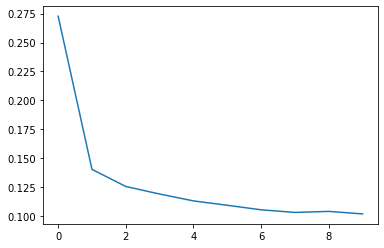

In [14]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [15]:
model.evaluate(X_valid,y_valid)  # loss on the validation set

15/15 [==============================] - 0s 2ms/step - loss: 0.0995


0.09951449185609818

In [17]:
y_pred_valid = model.predict(X_valid)
#y_pred_valid

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid.values, y_pred_valid.reshape(1,-1)[0])   # loss on the validation set

0.01686417940757162

# Exercise

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [4]:
df = pd.read_csv('abalone.csv')
print(df.shape)
df.head()

(4177, 9)


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
